In [38]:
import pandas as pd

#0=54 V, 1=54.5 V, 2=55 V, 3=55.5 V, 4=56 V, 5=56.5 V, 6=57 V

hl = 5
        
df = pd.read_csv('adj56.5v.CSV', sep=';')
masks = pd.read_csv('masks.csv', delimiter=';')

df['Counts'] = df['Counts'].replace(0, 1)

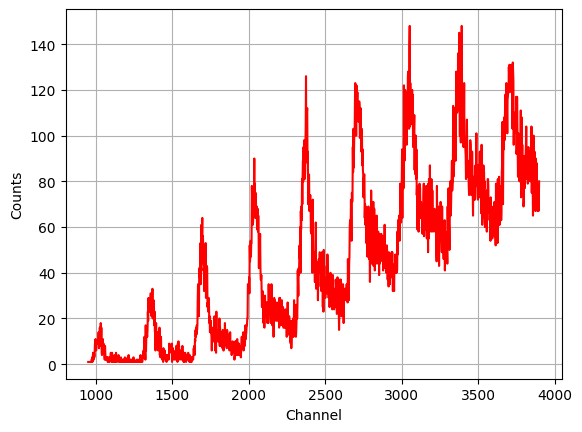

In [39]:
import matplotlib.pyplot as plt
import numpy as np

#plot the histogram
fig, ax = plt.subplots()
ax.plot(df['Channel'], df['Counts'], 'r-')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.grid()
plt.show()

In [40]:
yerr = np.sqrt(df['Counts'])

In [41]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm

def func(x, mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3, mu4, sigma4, A4, mu5, sigma5, A5, mu6, sigma6, A6, mu7, sigma7, A7, mu8, sigma8, A8, mu9, sigma9, A9, muB, sigmaB, B):
    return A1 * norm.pdf(x, mu1, sigma1) + A2 * norm.pdf(x, mu2, sigma2) + A3 * norm.pdf(x, mu3, sigma3) + A4 * norm.pdf(x, mu4, sigma4) + A5 * norm.pdf(x, mu5, sigma5) + A6 * norm.pdf(x, mu6, sigma6) + A7 * norm.pdf(x, mu7, sigma7) + A8 * norm.pdf(x, mu8, sigma8) + A9 * norm.pdf(x, mu9, sigma9) + B * norm.pdf(x, muB, sigmaB)

ls = LeastSquares(df['Channel'], df['Counts'], yerr, func)
m = Minuit(ls, mu1=masks['Media1'][hl], sigma1=20, A1=masks['A1'][hl], mu2=masks['Media2'][hl], sigma2=20, A2=masks['A2'][hl], mu3=masks['Media3'][hl], sigma3=20, A3=masks['A3'][hl], mu4=masks['Media4'][hl], sigma4=20, A4=masks['A4'][hl], mu5=masks['Media5'][hl], sigma5=20, A5=masks['A5'][hl], mu6=masks['Media6'][hl], sigma6=20, A6=masks['A6'][hl], mu7=masks['Media7'][hl], sigma7=20, A7=masks['A7'][hl], mu8=masks['Media8'][hl], sigma8=20, A8=masks['A8'][hl], mu9=masks['Media9'][hl], sigma9=20, A9=masks['A9'][hl], muB=masks['MediaB'][hl], sigmaB=2000, B=masks['AB'][hl])
m.values['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
ls.mask = (df['Channel'] > masks['Left1'][hl]) & (df['Channel'] < masks['Right1'][hl])
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left2'][hl]) & (df['Channel'] < masks['Right2'][hl])
m.values['A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left3'][hl]) & (df['Channel'] < masks['Right3'][hl])
m.values['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left4'][hl]) & (df['Channel'] < masks['Right4'][hl])
m.values['A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left5'][hl]) & (df['Channel'] < masks['Right5'][hl])
m.values['A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left6'][hl]) & (df['Channel'] < masks['Right6'][hl])
m.values['A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left7'][hl]) & (df['Channel'] < masks['Right7'][hl])
m.values['A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left8'][hl]) & (df['Channel'] < masks['Right8'][hl])
m.values['A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left9'][hl]) & (df['Channel'] < masks['Right9'][hl])
m.values['B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()


ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 2000)
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9'] = True
m.migrad()
m.hesse()


ls.mask = None
m.fixed = False
m.migrad()
m.hesse()
display(m)
print(m.values)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2408 (χ²/ndof = 1.7)       │             Nfcn = 5797              │
│ EDM = 0.000164 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu1    │ 1.0234e3  │ 0.0017e3  │            │            │         │         │       │
│ 1 │ sigma1 │   23.9    │    1.6    │            │            │         │         │       │
│ 2 │ A1     │    580    │    40     │            │            │         │         │       │
│ 3 │ mu2    │ 1.3649e3  │ 0.0011e3  │            │            │         │         │       │
│ 4 │ sigma2 │   22.4    │    0.9    │            │            │         │         │       │
│ 5 │ A2     │  1.41e3   │  0.06e3   │            │            │         │         │       │
│ 6 │ mu3    │ 1.7037e3  │ 0.0009e3  │            │            │         │         │       │
│ 7 │ sigma3 │   25.2    │    0.7    │            │            │         │         │       │
│ 8 │ A3     │  2.87e3   │  0.09e3   │            │            │         │         │       │
│ 9 │ mu4    │ 2.0430e3  │ 0.0008e3  │            │            │         │         │       │
│ 10│ sigma4 │   28.4    │    0.7    │            │            │         │         │       │
│ 11│ A4     │  4.47e3   │  0.12e3   │            │            │         │         │       │
│ 12│ mu5    │ 2.3786e3  │ 0.0009e3  │            │            │         │         │       │
│ 13│ sigma5 │   29.9    │    0.8    │            │            │         │         │       │
│ 14│ A5     │  5.51e3   │  0.14e3   │            │            │         │         │       │
│ 15│ mu6    │ 2.7167e3  │ 0.0010e3  │            │            │         │         │       │
│ 16│ sigma6 │   32.1    │    0.9    │            │            │         │         │       │
│ 17│ A6     │  6.36e3   │  0.17e3   │            │            │         │         │       │
│ 18│ mu7    │ 3.0511e3  │ 0.0012e3  │            │            │         │         │       │
│ 19│ sigma7 │   33.6    │    1.1    │            │            │         │         │       │
│ 20│ A7     │   5.7e3   │   0.2e3   │            │            │         │         │       │
│ 21│ mu8    │ 3.3811e3  │ 0.0016e3  │            │            │         │         │       │
│ 22│ sigma8 │   30.5    │    1.4    │            │            │         │         │       │
│ 23│ A8     │  4.29e3   │  0.19e3   │            │            │         │         │       │
│ 24│ mu9    │ 3.7134e3  │ 0.0019e3  │            │            │         │         │       │
│ 25│ sigma9 │   31.6    │    1.8    │            │            │         │         │       │
│ 26│ A9     │  3.95e3   │  0.23e3   │            │            │         │         │       │
│ 27│ muB    │  3.810e3  │  0.026e3  │            │            │         │         │       │
│ 28│ sigmaB │    905    │    12     │            │            │         │         │       │
│ 29│ B      │   172e3   │    4e3    │            │            │         │         │       │
└───┴────────┴─────

<ValueView mu1=1023.4199987507246 sigma1=23.9069668869088 A1=578.0927542876607 mu2=1364.9246585025435 sigma2=22.41218101027573 A2=1408.8677898849526 mu3=1703.7280686427903 sigma3=25.195164665160735 A3=2874.8046896475153 mu4=2043.0349610140822 sigma4=28.381621130425998 A4=4468.556657062632 mu5=2378.5621069832277 sigma5=29.925929424101074 A5=5509.20897379371 mu6=2716.744725026078 sigma6=32.130845449293766 A6=6358.647994632882 mu7=3051.1103973114236 sigma7=33.57372603064628 A7=5701.883167606163 mu8=3381.05715541372 sigma8=30.494513080664117 A8=4294.067070826269 mu9=3713.4059561179292 sigma9=31.564043723220585 A9=3950.2595127758905 muB=3810.252691979399 sigmaB=905.2302829736886 B=172057.89939611865>


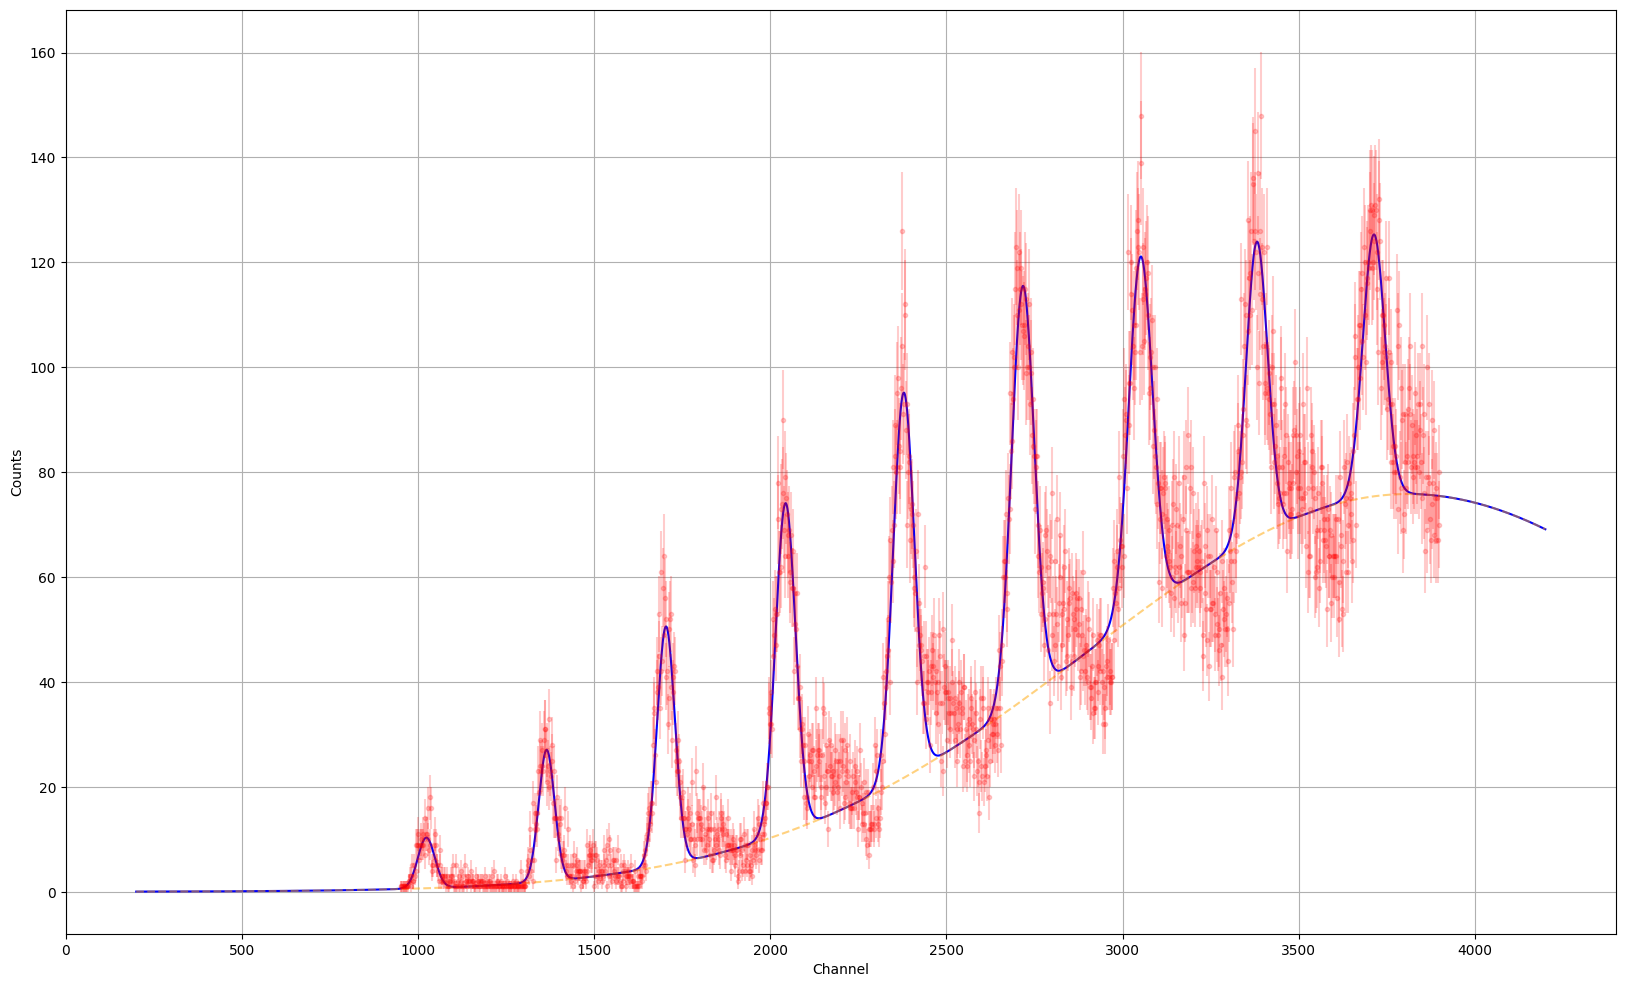

In [42]:
#plotta la funzione
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
x = np.linspace(200, 4200, 10000)
y = func(x, *m.values)
ax.plot(x, y, 'b-')
ax.plot(x, norm.pdf(x, m.values['muB'], m.values['sigmaB'])*m.values['B'], color='orange', linestyle='--', alpha=0.5)
ax.errorbar(df['Channel'], df['Counts'], yerr, fmt='r.', alpha=0.2)
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.grid()
plt.show()

In [43]:
list_deltachannel = np.array([m.values['mu2']-m.values['mu1'], m.values['mu3']-m.values['mu2']]) #complete
list_deltachannel = np.append(list_deltachannel, [m.values['mu4']-m.values['mu3'], m.values['mu5']-m.values['mu4'], m.values['mu6']-m.values['mu5'], m.values['mu7']-m.values['mu6'], m.values['mu8']-m.values['mu7'], m.values['mu9']-m.values['mu8']])

correction_factor = (2*(4*10**(-9)))/(50*(2**12)*32)

gain = np.mean(list_deltachannel)*correction_factor/(1.602*10**(-19))
gain_err = np.std(list_deltachannel)/np.sqrt(len(list_deltachannel))*correction_factor/(1.602*10**(-19))

print('gain =', gain, '+/-', gain_err)
print('convADC =', np.mean(list_deltachannel), '+/-', np.std(list_deltachannel)/np.sqrt(len(list_deltachannel)))

gain = 2562167.80927299 +/- 9817.254492986263
convADC = 336.2482446709006 +/- 1.2883756398808262


In [45]:
from jax import grad, jacfwd
import jax.numpy as np

def error_prop_jax_gen(q,x,dx):
    jac = jacfwd(q)
    return np.sqrt(np.sum(np.power(jac(x)*dx,2)))

def resolution_function(x):
    return (x[2]-x[0])/np.sqrt(x[3]**2-x[1]**2)

x_=np.array([m.values['mu2'], m.values['sigma2'], m.values['mu3'], m.values['sigma3']])
dx_=np.array([m.errors['mu2'], m.errors['sigma2'], m.errors['mu3'], m.errors['sigma3']])

print('resolution =', resolution_function(x_), '+/-', error_prop_jax_gen(resolution_function, x_, dx_))

resolution = 29.434425 +/- 5.8757687


In [46]:
print(m.values['mu3'], m.errors['mu3'])

1703.7280686427903 0.901661044149758
